In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

df = pd.read_csv('Data Harga Rumah - Jakarta Pusat Belakang.csv')
df.head()

,NRP,Nama,harga,jumlah_kamar_tidur,jumlah_kamar_mandi,luas_tanah,luas_bangunan,carport,pasokan_listrik,kota/kabupaten,kecamatan,kelurahan,keamanan,taman,jarak_dengan_rumah_sakit_terdekat,jarak_dengan_sekolah_terdekat,jarak_dengan_tol_terdekat,link
0,2173020,Raimundo,3000000000,4,2,125,180,2,11000,Jakarta Pusat,Petojo,Kelurahan Petojo,Tidak ada,Ada,0.75,1.10,1.20,https://www.rumah123.com/properti/jakarta-pusa...
1,2173020,Raimundo,5000000000,4,3,253,200,3,3500,Jakarta Pusat,Cempaka Putih,Kelurahan Cempaka Putih,Ada,Tidak ada,1.20,1.00,2.30,https://www.rumah123.com/properti/jakarta-pusa...
2,2173020,Raimundo,4200000000,8,5,305,533,3,4400,Jakarta Pusat,Cempaka Putih,Kelurahan Cempaka Putih,Tidak ada,Ada,1.20,1.00,2.30,https://www.rumah123.com/properti/jakarta-pusa...
3,2173020,Raimundo,6000000000,2,1,157,100,2,2200,Jakarta Pusat,Bendungan Hilir,Kelurahan Bendungan Hilir,Tidak ada,Tidak ada,0.24,0.35,2.30,https://www.rumah123.com/properti/jakarta-pusa...
4,2173020,Raimundo,4000000000,3,2,120,100,1,3000,Jakarta Pusat,Bendungan Hilir,Kelurahan Bendungan Hilir,Ada,Ada,0.71,1.10,0.71,https://www.rumah123.com/properti/jakarta-pusa...


### EDA

In [260]:
print(f"Kota/Kab. unique values ({len(df['kota/kabupaten'].unique().tolist())}): {df['kota/kabupaten'].unique().tolist()}")
print(f"Kecamatan unique values ({len(df['kecamatan'].unique().tolist())}): {df['kecamatan'].unique().tolist()}")
print(f"Kelurahan unique values ({len(df['kelurahan'].unique().tolist())}): {df['kelurahan'].unique().tolist()}")

Kota/Kab. unique values (1): ['Jakarta Pusat']
Kecamatan unique values (28): ['Petojo', 'Cempaka Putih', 'Bendungan Hilir', 'Menteng', 'Kemayoran', 'Senen', 'Johar Baru', 'Tanah Abang', 'Cikini', 'Kartini', 'Cideng', 'Gambir', 'Glodok', 'Sumur Batu', 'Sawah Besar', 'Salemba', 'Pejompongan', 'Percetakan Negara', 'Gunung Sahari', 'Kramat', 'Karang Anyar', 'Thamrin', 'Pasar Baru', 'Senayan', 'Gondangdia', 'Bungur', 'Menteng Atas', 'Kebon Kacang']
Kelurahan unique values (28): ['Kelurahan Petojo', 'Kelurahan Cempaka Putih', 'Kelurahan Bendungan Hilir', 'Kelurahan Menteng', 'Kelurahan Kemayoran', 'Kelurahan Senen', 'Kelurahan Johar Baru', 'Kelurahan Tanah Abang', 'Kelurahan Cikini', 'Kelurahan Kartini', 'Kelurahan Cideng', 'Kelurahan Gambir', 'Kelurahan Glodok', 'Kelurahan Sumur Batu', 'Kelurahan Sawah Besar', 'Kelurahan Salemba', 'Kelurahan Pejompongan', 'Kelurahan Percetakan Negara', 'Kelurahan Gunung Sahari', 'Kelurahan Kramat', 'Kelurahan Karang Anyar', 'Kelurahan Thamrin', 'Kelurahan P

In [261]:
df.drop(['NRP', 'Nama', 'link', 'kota/kabupaten', 'kelurahan'], axis=1, inplace=True)

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   harga                              250 non-null    int64  
 1   jumlah_kamar_tidur                 250 non-null    int64  
 2   jumlah_kamar_mandi                 250 non-null    int64  
 3   luas_tanah                         250 non-null    int64  
 4   luas_bangunan                      250 non-null    int64  
 5   carport                            250 non-null    int64  
 6   pasokan_listrik                    250 non-null    int64  
 7   kecamatan                          250 non-null    object 
 8   keamanan                           250 non-null    object 
 9   taman                              250 non-null    object 
 10  jarak_dengan_rumah_sakit_terdekat  250 non-null    float64
 11  jarak_dengan_sekolah_terdekat      250 non-null    float64

In [263]:
df.head()

,harga,jumlah_kamar_tidur,jumlah_kamar_mandi,luas_tanah,luas_bangunan,carport,pasokan_listrik,kecamatan,keamanan,taman,jarak_dengan_rumah_sakit_terdekat,jarak_dengan_sekolah_terdekat,jarak_dengan_tol_terdekat
0,3000000000,4,2,125,180,2,11000,Petojo,Tidak ada,Ada,0.75,1.10,1.20
1,5000000000,4,3,253,200,3,3500,Cempaka Putih,Ada,Tidak ada,1.20,1.00,2.30
2,4200000000,8,5,305,533,3,4400,Cempaka Putih,Tidak ada,Ada,1.20,1.00,2.30
3,6000000000,2,1,157,100,2,2200,Bendungan Hilir,Tidak ada,Tidak ada,0.24,0.35,2.30
4,4000000000,3,2,120,100,1,3000,Bendungan Hilir,Ada,Ada,0.71,1.10,0.71


In [264]:
def dist_col_plot(rows, cols, data):
    fig, axes = plt.subplots(rows, cols, figsize=(16, 8))

    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(data.columns):
            sns.histplot(data=data, x=data.columns[i], ax=ax)
            ax.set_title(data.columns[i], fontsize=14)
            ax.tick_params(axis='x', labelsize=14)
            ax.tick_params(axis='y', labelsize=14)
            ax.set_xlabel("")
            ax.set_ylabel('Count', fontsize=14)
        else:
            ax.set_visible(False)

    plt.tight_layout()
    plt.show()

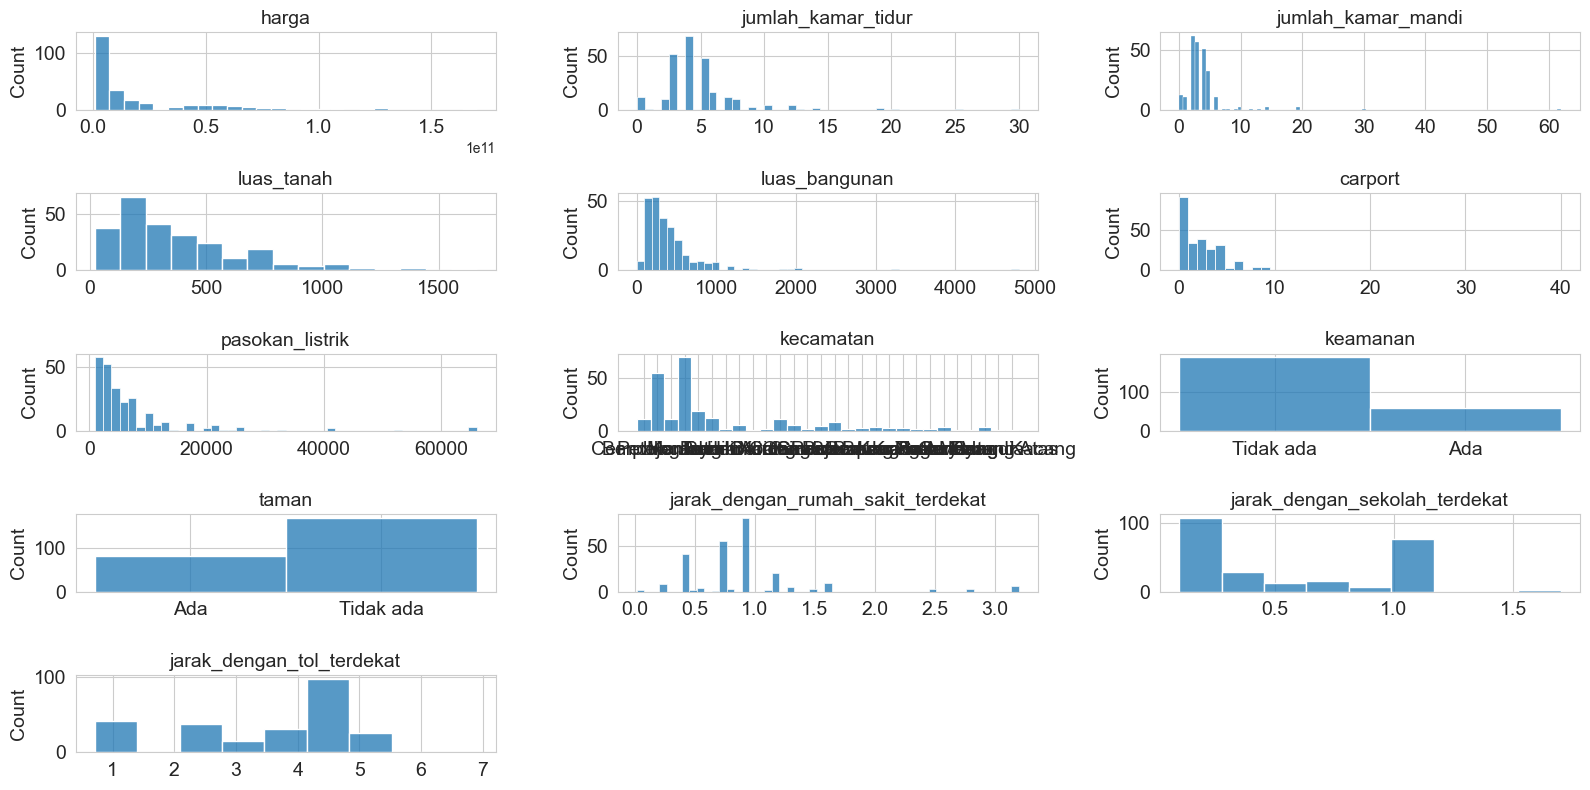

In [265]:
dist_col_plot(rows=5, cols=3, data=df)

### Checking Outliers

In [266]:
def plot_box(data, labels, title, figsize=(10, 5)):
    sns.set_style("whitegrid")
    plt.figure(figsize=figsize)
    ax = sns.boxplot(data=data, orient='h', showmeans=True)
    ax.set_xlabel('Value', fontsize=14)  
    ax.set_title(title, fontsize=14)
    ax.set_yticklabels(labels, fontsize=14)
    ax.tick_params(axis='x', labelsize=14) 
    plt.show()

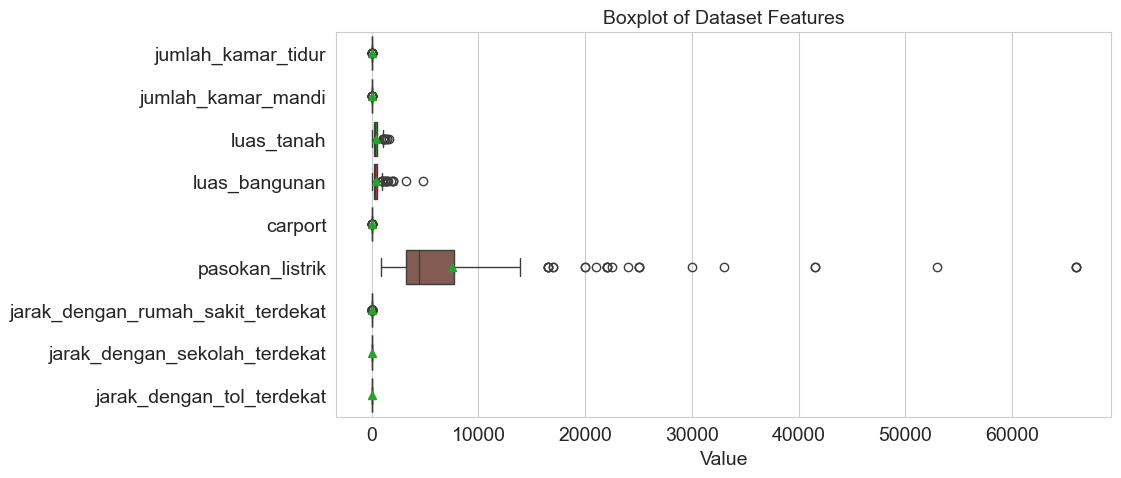

In [267]:
data = df.select_dtypes(exclude='object').drop('harga', axis=1)

plot_box(data = data,
         labels = data.columns.tolist(),
         title='Boxplot of Dataset Features')

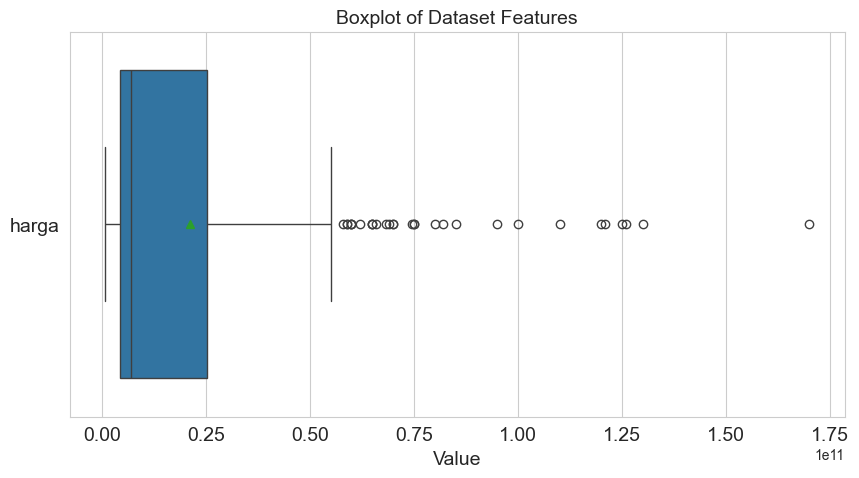

In [268]:
plot_box(data = df['harga'],
         labels = ['harga'],
         title='Boxplot of Dataset Features')

### Scaling

In [269]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols = df.select_dtypes(exclude='object').columns
df[cols] = scaler.fit_transform(df[cols])

In [270]:
df.head()

,harga,jumlah_kamar_tidur,jumlah_kamar_mandi,luas_tanah,luas_bangunan,carport,pasokan_listrik,kecamatan,keamanan,taman,jarak_dengan_rumah_sakit_terdekat,jarak_dengan_sekolah_terdekat,jarak_dengan_tol_terdekat
0,0.013294,0.133333,0.032258,0.062767,0.037500,0.050,0.155146,Petojo,Tidak ada,Ada,0.229560,0.62500,0.079160
1,0.025111,0.133333,0.048387,0.140768,0.041667,0.075,0.039939,Cempaka Putih,Ada,Tidak ada,0.371069,0.56250,0.256866
2,0.020384,0.266667,0.080645,0.172456,0.111042,0.075,0.053763,Cempaka Putih,Tidak ada,Ada,0.371069,0.56250,0.256866
3,0.031019,0.066667,0.016129,0.082267,0.020833,0.050,0.019969,Bendungan Hilir,Tidak ada,Tidak ada,0.069182,0.15625,0.256866
4,0.019202,0.100000,0.032258,0.059720,0.020833,0.025,0.032258,Bendungan Hilir,Ada,Ada,0.216981,0.62500,0.000000


### Encoding 

In [271]:
df.select_dtypes(include='object')

,kecamatan,keamanan,taman
0,Petojo,Tidak ada,Ada
1,Cempaka Putih,Ada,Tidak ada
2,Cempaka Putih,Tidak ada,Ada
3,Bendungan Hilir,Tidak ada,Tidak ada
4,Bendungan Hilir,Ada,Ada
...,...,...,...
245,Menteng,Tidak ada,Ada
246,Cempaka Putih,Ada,Tidak ada
247,Cempaka Putih,Tidak ada,Tidak ada
248,Cempaka Putih,Ada,Ada


In [272]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col_obj in df.select_dtypes(include='object'): 
    df[col_obj] = le.fit_transform(df[col_obj])

In [273]:
df.head()

,harga,jumlah_kamar_tidur,jumlah_kamar_mandi,luas_tanah,luas_bangunan,carport,pasokan_listrik,kecamatan,keamanan,taman,jarak_dengan_rumah_sakit_terdekat,jarak_dengan_sekolah_terdekat,jarak_dengan_tol_terdekat
0,0.013294,0.133333,0.032258,0.062767,0.037500,0.050,0.155146,20,1,0,0.229560,0.62500,0.079160
1,0.025111,0.133333,0.048387,0.140768,0.041667,0.075,0.039939,2,0,1,0.371069,0.56250,0.256866
2,0.020384,0.266667,0.080645,0.172456,0.111042,0.075,0.053763,2,1,0,0.371069,0.56250,0.256866
3,0.031019,0.066667,0.016129,0.082267,0.020833,0.050,0.019969,0,1,1,0.069182,0.15625,0.256866
4,0.019202,0.100000,0.032258,0.059720,0.020833,0.025,0.032258,0,0,0,0.216981,0.62500,0.000000


### Clustering Tipe Rumah

Split Data

In [274]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = df.drop('harga', axis=1)
y = df['harga']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#### PCA

In [275]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

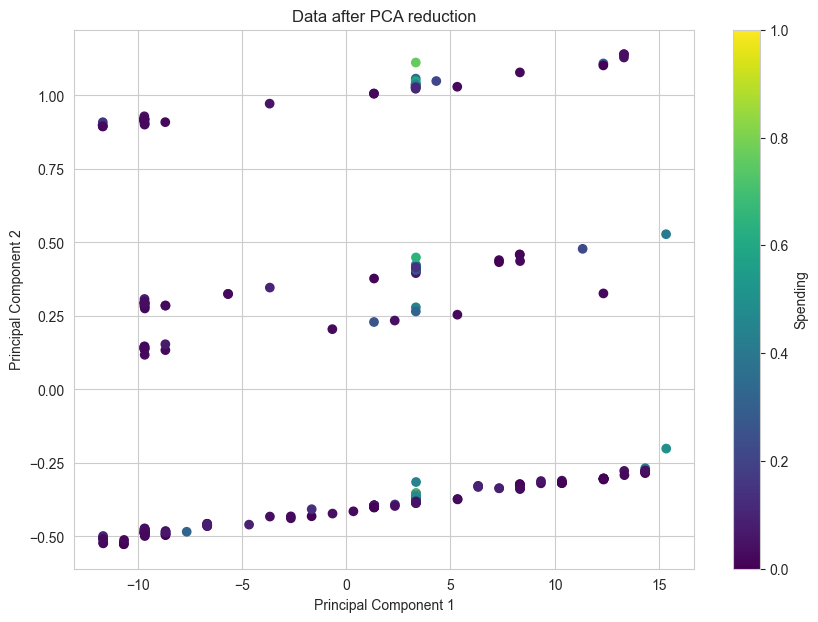

In [276]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data after PCA reduction')
plt.colorbar(label='Spending')
plt.show()

#### Penentuan total K (Cluster)

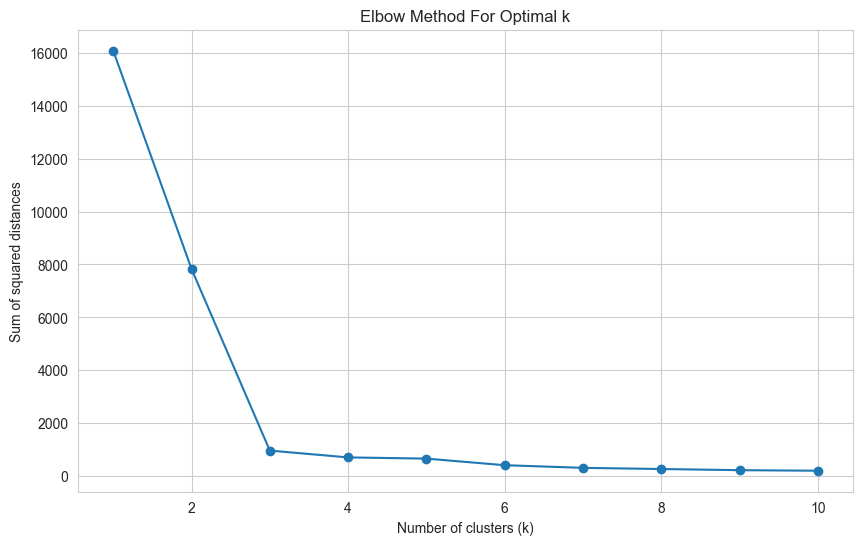

In [277]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

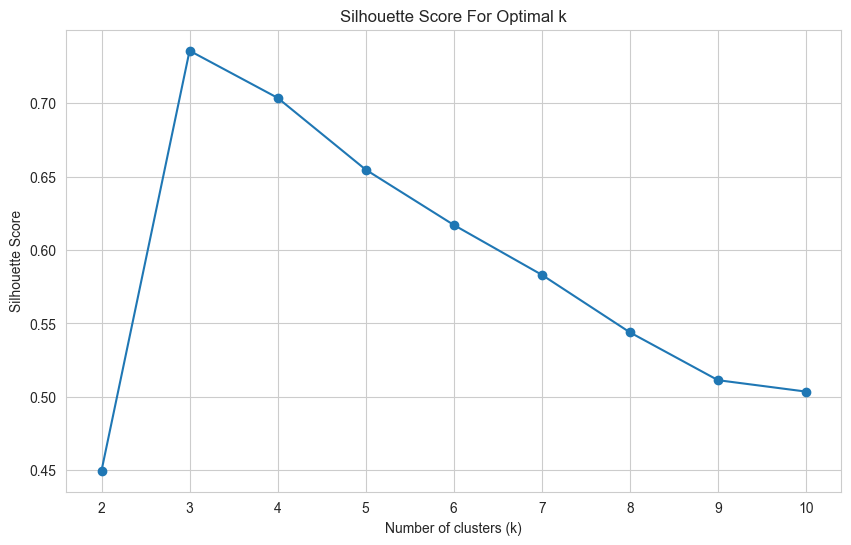

In [278]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

Model K-Means untuk clustering

In [279]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

KMeans(n_clusters=3, random_state=42)

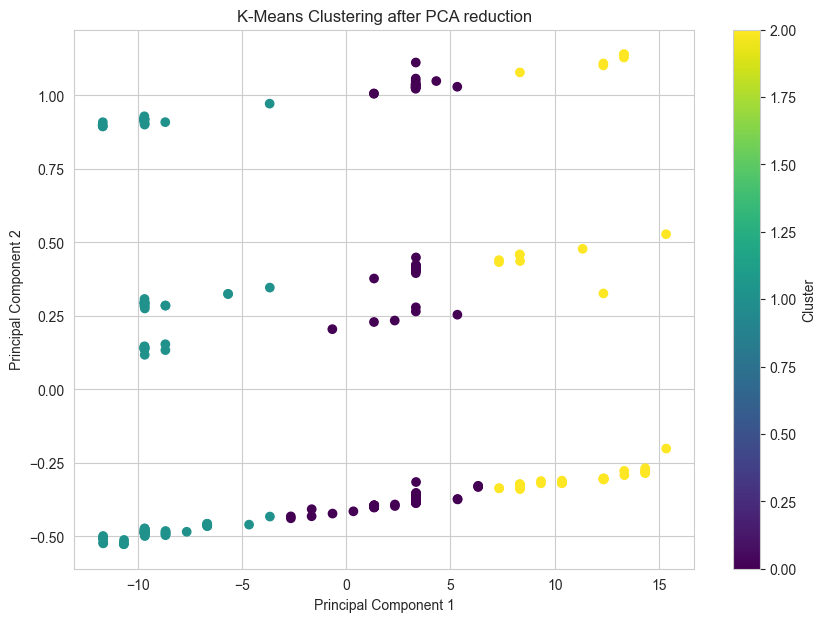

In [280]:
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering after PCA reduction')
plt.colorbar(label='Cluster')
plt.show()

In [281]:
df['cluster'] = kmeans.labels_

In [282]:
df.head()

,harga,jumlah_kamar_tidur,jumlah_kamar_mandi,luas_tanah,luas_bangunan,carport,pasokan_listrik,kecamatan,keamanan,taman,jarak_dengan_rumah_sakit_terdekat,jarak_dengan_sekolah_terdekat,jarak_dengan_tol_terdekat,cluster
0,0.013294,0.133333,0.032258,0.062767,0.037500,0.050,0.155146,20,1,0,0.229560,0.62500,0.079160,2
1,0.025111,0.133333,0.048387,0.140768,0.041667,0.075,0.039939,2,0,1,0.371069,0.56250,0.256866,1
2,0.020384,0.266667,0.080645,0.172456,0.111042,0.075,0.053763,2,1,0,0.371069,0.56250,0.256866,1
3,0.031019,0.066667,0.016129,0.082267,0.020833,0.050,0.019969,0,1,1,0.069182,0.15625,0.256866,1
4,0.019202,0.100000,0.032258,0.059720,0.020833,0.025,0.032258,0,0,0,0.216981,0.62500,0.000000,1


In [283]:
for i in range(0, 3):
    mean_harga = df[df['cluster'] == i]['harga'].mean()
    print(f"Cluster {i} mean: {mean_harga}")

Cluster 0 mean: 0.2206070064936875
Cluster 1 mean: 0.040541922777592485
Cluster 2 mean: 0.059176876068004765


### Model

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   harga                              250 non-null    float64
 1   jumlah_kamar_tidur                 250 non-null    float64
 2   jumlah_kamar_mandi                 250 non-null    float64
 3   luas_tanah                         250 non-null    float64
 4   luas_bangunan                      250 non-null    float64
 5   carport                            250 non-null    float64
 6   pasokan_listrik                    250 non-null    float64
 7   kecamatan                          250 non-null    int32  
 8   keamanan                           250 non-null    int32  
 9   taman                              250 non-null    int32  
 10  jarak_dengan_rumah_sakit_terdekat  250 non-null    float64
 11  jarak_dengan_sekolah_terdekat      250 non-null    float64

In [285]:
from sklearn.metrics import mean_absolute_error, r2_score

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mae = round(mae, 4) * 100
    
    r2 = r2_score(y_test, predictions)
    r2 = round(r2, 4) * 100
    
    print(f"Mean Absolute Error: {mae} %")
    print(f"R-Squared: {r2}")
    
    return mae, r2

#### Baseline Model

Linear Regression

In [286]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

mae_lr, r2_lr = evaluate_model(lr, X_test, y_test) 

Mean Absolute Error: 4.859999999999999 %
R-Squared: 73.77


SVR (Support Vector Regression)

In [287]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
mae_svr, r2_svr = evaluate_model(svr, X_test, y_test) 

Mean Absolute Error: 8.0 %
R-Squared: 44.59


XGBRegressor

In [288]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
print("XGBRegressor:")
mae_xgb, r2_xgb = evaluate_model(xgb, X_test, y_test) 

XGBRegressor:
Mean Absolute Error: 2.92 %
R-Squared: 74.26


Random Forest

In [289]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
mae_rf, r2_rf = evaluate_model(rf, X_test, y_test) 

Mean Absolute Error: 2.9499999999999997 %
R-Squared: 78.01


Decision Tree

In [290]:
from sklearn.tree import DecisionTreeRegressor

dt = RandomForestRegressor()
dt.fit(X_train, y_train)
mae_dt, r2_dt = evaluate_model(dt, X_test, y_test) 

Mean Absolute Error: 3.17 %
R-Squared: 73.38


Model Evaluation

In [291]:
pd.DataFrame({
    'Baseline Model': ['Linear Regression', 'SVR', 'XGBoost', 'Random Forest', 'Decision Tree'],
    'MAE': [mae_lr, mae_svr, mae_xgb, mae_rf, mae_dt],
    'R-Squared': [r2_lr, r2_svr, r2_xgb, r2_rf, r2_dt]
}).sort_values(by=['MAE', 'R-Squared']).reset_index(drop=True)

,Baseline Model,MAE,R-Squared
0,XGBoost,2.92,74.26
1,Random Forest,2.95,78.01
2,Decision Tree,3.17,73.38
3,Linear Regression,4.86,73.77
4,SVR,8.00,44.59


#### Hyperparameter Tuning

In [292]:
from sklearn.model_selection import GridSearchCV, KFold

kfold = KFold(n_splits=10, shuffle=True)

SVR

In [293]:
svr_params = {'C': range(1, 6), 'kernel': ['linear', 'rbf']}
svr = GridSearchCV(SVR(), svr_params, cv=kfold, n_jobs=-1)
svr.fit(X_train, y_train)

print(f"Best Params: {svr.best_params_}")
mae_best_svr, r2_best_svr = evaluate_model(svr.best_estimator_, X_test, y_test) 

Best Params: {'C': 1, 'kernel': 'linear'}
Mean Absolute Error: 5.94 %
R-Squared: 66.94


XGBoost

In [294]:
xgb_params = {'n_estimators': range(0, 50, 5), 'learning_rate': np.linspace(0.01, 1, 10), 'max_depth': range(1, 5)}
xgb = GridSearchCV(XGBRegressor(), xgb_params, cv=kfold, n_jobs=-1)
xgb.fit(X_train, y_train)

print(f"Best Params: {xgb.best_params_}")
mae_best_xgb, r2_best_xgb = evaluate_model(xgb.best_estimator_, X_test, y_test) 

Best Params: {'learning_rate': 0.56, 'max_depth': 3, 'n_estimators': 5}
Mean Absolute Error: 2.87 %
R-Squared: 79.17


Random Forest

In [295]:
rf_params = {'n_estimators': range(0, 50, 5), 'max_depth': range(1, 10)}
rf = GridSearchCV(RandomForestRegressor(), rf_params, cv=kfold, n_jobs=-1)
rf.fit(X_train, y_train)

print(f"Best Params: {rf.best_params_}")
mae_best_rf, r2_best_rf = evaluate_model(rf.best_estimator_, X_test, y_test) 

Best Params: {'max_depth': 3, 'n_estimators': 35}
Mean Absolute Error: 2.71 %
R-Squared: 78.78


Decision Tree

In [296]:
dt_params = {'max_depth': range(1, 10), 'min_samples_split': range(1, 10)}
dt = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=kfold, n_jobs=-1)
dt.fit(X_train, y_train)

print(f"Best Params: {dt.best_params_}")
mae_best_dt, r2_best_dt = evaluate_model(dt.best_estimator_, X_test, y_test) 

Best Params: {'max_depth': 4, 'min_samples_split': 8}
Mean Absolute Error: 2.97 %
R-Squared: 78.63


Evaluation Hyperparameter Tuning Model

In [297]:
pd.DataFrame({
    'Model': ['Linear Regression', 'SVR', 'XGBoost', 'Random Forest', 'Decision Tree'],
    'Baseline MAE': [mae_lr, mae_svr, mae_xgb, mae_rf, mae_dt],
    'Best MAE': [mae_lr, mae_best_svr, mae_best_xgb, mae_best_rf, mae_best_dt],
    'Baseline R-Squared': [r2_lr, r2_svr, r2_xgb, r2_rf, r2_dt],
    'Best R-Squared': [r2_lr, r2_best_svr, r2_best_xgb, r2_best_rf, r2_best_dt]
}).sort_values(by=['Baseline MAE', 'Best MAE']).reset_index(drop=True)

,Model,Baseline MAE,Best MAE,Baseline R-Squared,Best R-Squared
0,XGBoost,2.92,2.87,74.26,79.17
1,Random Forest,2.95,2.71,78.01,78.78
2,Decision Tree,3.17,2.97,73.38,78.63
3,Linear Regression,4.86,4.86,73.77,73.77
4,SVR,8.00,5.94,44.59,66.94


### Dumping Model

In [298]:
import joblib

joblib.dump(xgb, 'model.joblib')

['model.joblib']